In [1]:
#As part of Metro's contract with Red River Waste Solutions, failure to remedy an action or inaction will result in liquidated damages. One category of 
#liquidated damages is related to chronic problems in any category of service at the same premises. A chronic problem is defined as more than one 
#missed pickup for any address. The first missed pickup will not result in a fine; however, every subsequent missed pickup will result in a $200 fine.

#Your job is to determine the total amount of damages due to missed pickups. Note that not all rows that you have been provided correspond to missed 
#pickups and that you will need to ensure that you are only counting missed pickups.

#What other types of complaints are there?
#Make a heat map that shows the most total missed pick ups and another that shows the total fines, each by zip code.
#How do metro crews compare to the contractor's performance?
#How much does each trash hauler owe?
#What were to total missed pickup by route?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#had to route the location of my project
import os
os.chdir("C:/Users/madis/OneDrive/Desktop/COHORT10/PYTHON/GROUP PROJECTS/trash-haulers-ctrl-alt-elite-company")

In [4]:
import os
os.chdir("C:/Users/madis/OneDrive/Desktop/COHORT10/PYTHON")

In [5]:
df = pd.read_csv("GROUP PROJECTS/trash-haulers-ctrl-alt-elite-company/Data/trash_hauler_report.csv")

In [6]:
#first 5
df.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066


In [7]:
#last 5
df.tail()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187
20225,267137,11/01/19,Trash - Curbside/Alley Missed Pickup,possibly others missed as well,"604 Somerset Ct, Nashville, TN 37217, United S...",37217.0,RED RIVER,2505,29.0,1.781360e+06,637742.006846


In [8]:
#getting info of columns
df.columns

Index(['Request Number', 'Date Opened', 'Request ', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y'],
      dtype='object')

In [9]:
#there are spaces after some of the names that will need to be removed

In [10]:
df.columns = df.columns.str.strip()

In [11]:
df.columns

Index(['Request Number', 'Date Opened', 'Request', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  object 
 3   Description       20195 non-null  object 
 4   Incident Address  20217 non-null  object 
 5   Zip Code          20151 non-null  float64
 6   Trash Hauler      19325 non-null  object 
 7   Trash Route       19279 non-null  object 
 8   Council District  20177 non-null  float64
 9   State Plan X      20198 non-null  float64
 10  State Plan Y      20198 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.7+ MB


In [13]:
df.shape

(20226, 11)

In [14]:
# trying to filter the rows where either the Request or Description column contains "miss'missed_pickups"
missed_pickups = df[df['Request'].str.contains("Trash - Curbside/Alley Missed Pickup", case=False, na=False)]

In [15]:
#combined missed pick ups from request/description
print("\nNumber of Missed Pickup Requests (filtered from both 'Request' and 'Description'):")
print(missed_pickups.shape[0])


Number of Missed Pickup Requests (filtered from both 'Request' and 'Description'):
15028


In [16]:
#looked back at data set and there are other reasons why trash wasn't picked up. need to change things up.

In [39]:
missed_pickup_filter = (
    df['Request'].str.contains('missed pickup', case=False, na=False) |
    df['Description'].str.contains('missed|not collected|did not pick up', case=False, na=False)
)
missed_pickups = df[missed_pickup_filter]
missed_pickups

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
8,25330,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [40]:
# grouping by 'Incident Address' and counting the occurrences
address_counts = missed_pickups['Incident Address'].value_counts()
address_counts

Incident Address
5135 Hickory Hollow Pkwy                                      21
12546 Old Hickory Blvd, Nashville, TN 37013, United States    19
6007 Obrien Ave, Nashville, TN 37209, United States           19
802 Crescent Rd, Nashville, TN 37205, United States           18
3710 N NATCHEZ CT                                             18
                                                              ..
1429 riverside dr                                              1
1812 6th Ave N, Nashville, TN 37208, United States             1
101 Allendale Dr                                               1
538 Croley Dr, Nashville, TN 37209, United States              1
604 Somerset Ct, Nashville, TN 37217, United States            1
Name: count, Length: 12413, dtype: int64

In [22]:
# counting for more than 1
addresses_with_multiple_missed_pickups = address_counts[address_counts > 1]

print("Addresses with More Than 1 Missed Pickup")
print(addresses_with_multiple_missed_pickups)

Addresses with More Than 1 Missed Pickup
Incident Address
5135 Hickory Hollow Pkwy                                      21
12546 Old Hickory Blvd, Nashville, TN 37013, United States    19
6007 Obrien Ave, Nashville, TN 37209, United States           19
802 Crescent Rd, Nashville, TN 37205, United States           18
3710 N NATCHEZ CT                                             18
                                                              ..
3101 Belwood St, Nashville, TN 37203, United States            2
1609 Lillian St                                                2
1009 Southside Ave B                                           2
3233 KINGS LN                                                  2
329 walton ln                                                  2
Name: count, Length: 2716, dtype: int64


In [24]:
# count missed pickups per address
missed_pickups_count = missed_pickups['Incident Address'].value_counts()
missed_pickups

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
8,25330,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [44]:
# filter for addresses with more than one missed pickup
#missed_pickups_count = missed_pickups_count[missed_pickups_count > 1]

In [41]:
# damages for each address (subtract 1 because the first missed pickup is not counted)
damages_due = (missed_pickups_count ) * 200
damages_due

Incident Address
5135 Hickory Hollow Pkwy                                      4200
12546 Old Hickory Blvd, Nashville, TN 37013, United States    3800
6007 Obrien Ave, Nashville, TN 37209, United States           3800
802 Crescent Rd, Nashville, TN 37205, United States           3600
3710 N NATCHEZ CT                                             3600
                                                              ... 
1429 riverside dr                                              200
1812 6th Ave N, Nashville, TN 37208, United States             200
101 Allendale Dr                                               200
538 Croley Dr, Nashville, TN 37209, United States              200
604 Somerset Ct, Nashville, TN 37217, United States            200
Name: count, Length: 12413, dtype: int64

In [45]:
# total damages across all addresses
total_damages = damages_due.sum()
total_damages

3423600

In [46]:
#,adds commas to separate thousands, .2f makes 2 decimal places. f"${ makes currency.
print(f"Total Damages: ${total_damages:,.2f}")

Total Damages: $3,423,600.00


In [47]:
missed_pickup_filter = (
    df['Request'].str.contains('missed pickup', case=False, na=False) |
    df['Description'].str.contains('miss|skip|skipped|missed|not emptied|not taken|never empty|did not get picked up|not picked up|still full|still out|cart still out|full|not collected|did not pick up', case=False, na=False)
)
missed_pickups = df[missed_pickup_filter]
missed_pickups

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
7,25327,11/01/17,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,666013.601229
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [31]:
payable_miss = missed_pickups.loc[missed_pickups.duplicated(subset='Incident Address', keep='first') == True]
payable_miss

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
46,25586,11/02/17,Trash - Curbside/Alley Missed Pickup,Missed pickup,4311 dakota ave,37209.0,RED RIVER,1308,24.0,1.720743e+06,661438.818510
137,26284,11/06/17,Trash - Curbside/Alley Missed Pickup,missed,3124 Murfreesboro Pike,37013.0,RED RIVER,4502,33.0,1.784737e+06,629098.451312
156,26674,11/07/17,Trash - Curbside/Alley Missed Pickup,customer says trash is not being picked up bet...,111 2nd Ave N,37201.0,NaN,NaN,19.0,1.739543e+06,666600.801765
160,26745,11/07/17,Trash - Curbside/Alley Missed Pickup,Missed.,1112 Joseph Ave A,37207.0,METRO,9207,5.0,1.740731e+06,677098.400346
167,26864,11/08/17,Trash - Curbside/Alley Missed Pickup,customer says the trash pickup was missed again,3210 Whites Creek Pike,37207.0,RED RIVER,3201,3.0,1.726433e+06,691919.200296
...,...,...,...,...,...,...,...,...,...,...,...
20213,267035,11/01/19,Trash - Curbside/Alley Missed Pickup,"constantly missed, please pick up","1400 Dickerson Pike, Nashville, TN 37207, Unit...",37207.0,METRO,9204,5.0,1.740796e+06,679412.798844
20214,267060,11/01/19,Trash - Curbside/Alley Missed Pickup,entire street missed,"639 Heritage Dr, Nashville, TN 37115, United S...",37115.0,RED RIVER,3412,8.0,1.754842e+06,705326.399554
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809


In [76]:
df.head(15)

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
5,25317,11/01/17,Trash Collection Complaint,left trash cart in middle of driveway instead ...,3602 floral dr,37211.0,RED RIVER,4304,16.0,1.751660e+06,643215.201073
6,25325,11/01/17,Damage to Property,Trash/emptied Wednesday & now metal black-mail...,4721 Chalmers Dr,37215.0,RED RIVER,3303,34.0,1.726301e+06,637078.402245
7,25327,11/01/17,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,666013.601229
8,25330,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732
9,25331,11/01/17,Trash - Curbside/Alley Missed Pickup,"Trash missed Tuesday again, ALLEY",1206 Ireland St,37208.0,METRO,9208,19.0,1.733029e+06,668762.640891


In [48]:
#other complaints

In [50]:
other_complaints = df[~df['Request'].str.contains("Trash - Curbside/Alley Missed Pickup", case=False, na=False)]

# unique types of complaints (based on Request column that does not include trash-curbside)
unique_complaints = other_complaints['Request'].unique()
print(f"Other complaints: {unique_complaints}")

Other complaints: ['Trash - Backdoor' 'Trash Collection Complaint' 'Damage to Property']


In [ ]:
#there are 4 types of complaints to work with if you include trash- curbside/alley missed pickup

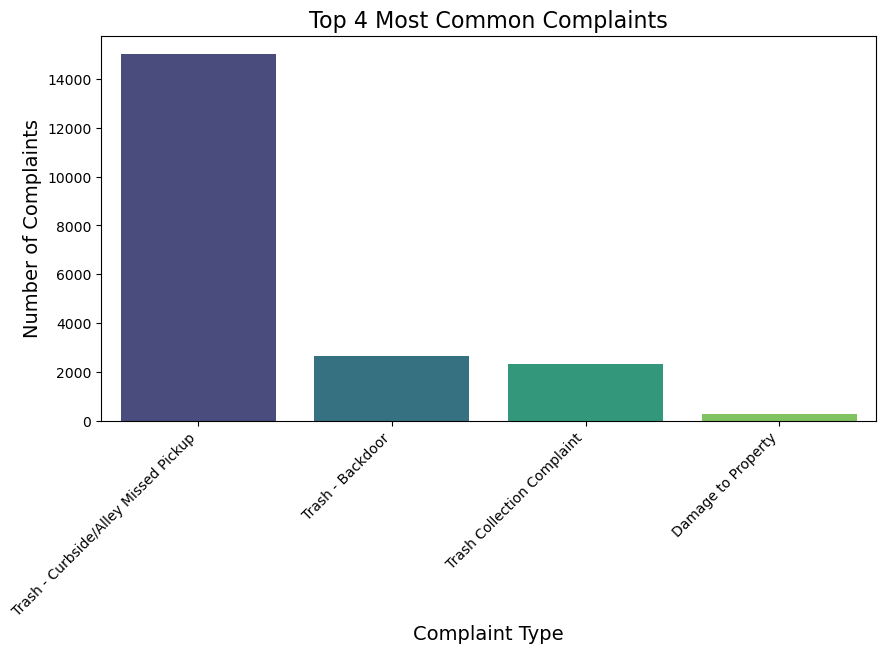

In [93]:
# counting the number of times a unique value appears in the request column, since i already know there is only 4 types i did a head(4)
request_counts = df['Request'].value_counts().head(4)

# plotting the bar chart. had to play around with the sizing a good bit. complaint types are on x-axis labels. count of each complaint are the y-values. 
# hue assigns different colors to each complaint category.
plt.figure(figsize=(10, 5))
sns.barplot(x=request_counts.index, y=request_counts.values, hue=request_counts.index, palette="viridis", legend=False)

# labels and title. this took some time.
plt.xlabel("Complaint Type", fontsize=14)
plt.ylabel("Number of Complaints", fontsize=14)
plt.title("Top 4 Most Common Complaints", fontsize=16)
plt.xticks(rotation=45, ha='right')  # :( i miss excel and powerbi lol i had to look up why these were not looking right, turns out my rotation was off.
plt.show()

In [62]:
request_counts = df['Request'].value_counts().head(4)
request_counts

Request
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: count, dtype: int64

In [65]:
print(df.columns)

Index(['Request Number', 'Date Opened', 'Request', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y'],
      dtype='object')


In [ ]:
#maybe I could do a line graph to see if certain months are higher than others, like us in winter when they didn't pick up for a month.

In [96]:
df['Date Opened'] = pd.to_datetime(df['Date Opened'])

In [91]:
df['YearMonth'] = df['Date Opened'].dt.to_period('M')
complaint_trend = df.groupby('YearMonth').size().reset_index(name='Complaint Count')

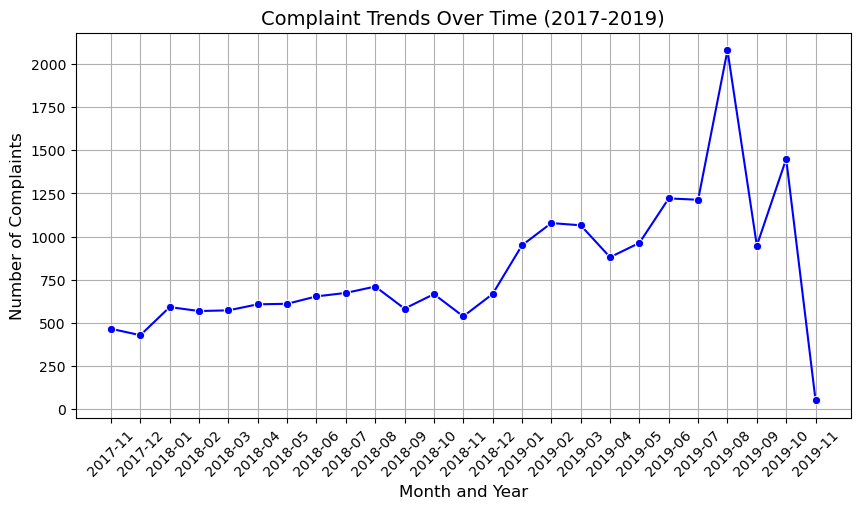

In [97]:
sns.set_palette("muted")

plt.figure(figsize=(10, 5))  
sns.lineplot(x=complaint_trend['YearMonth'].astype(str), 
             y=complaint_trend['Complaint Count'], 
             marker='o', color='b') 

plt.xlabel("Month and Year", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)
plt.title("Complaint Trends Over Time (2017-2019)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()